In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#from imblearn.over_sampling import SMOTENC
import os

In [2]:
main_df = pd.read_excel("Bank Data for case study assignment.xlsx")

In [3]:
#Sample Data
main_df.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


# Data Preprocessing

### Checking Column names

In [4]:
main_df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [5]:
#removing unwanted ' ' and '?' from columns

main_df.columns = ['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y']

In [6]:
main_df.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

In [7]:
#Attribute details

main_df.describe(include='all')

,age,job,marital status,education,credit default,housing loan,personal loan,y
count,1021.000000,1019,1020,1020,1020,1019,1019,1021
unique,NaN,12,3,4,2,3,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,617,524,998,583,869,897
mean,41.066601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.400013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Details w.r.t each column
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1019 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1019 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


In [9]:
#Total number of rows

len(main_df)

1021

In [10]:
#Number of nulls(NaN) in each column

main_df.isnull().sum()

age               0
job               2
marital status    1
education         1
credit default    1
housing loan      2
personal loan     2
y                 0
dtype: int64

In [11]:
#Number of rows with atleast 1 null(NaN)

main_df[main_df.isnull().any(axis=1)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
79,40,NaN,married,secondary,no,yes,no,no
97,30,admin.,single,NaN,no,no,no,no
108,56,unemployed,NaN,primary,no,no,no,yes
109,27,housemaid,married,primary,no,NaN,NaN,no
168,48,technician,married,tertiary,NaN,no,no,no
1000,38,admin.,married,secondary,no,yes,NaN,no
1004,42,NaN,single,secondary,no,yes,yes,yes
1016,33,services,married,secondary,no,NaN,no,no


In [12]:
#% of rows having atleast 1 NaN

main_df.isnull().any(axis=1).sum()*100/len(main_df)

0.7835455435847208

### As the % of rows is very less, we can drop these rows.

In [13]:
main_df = main_df[main_df.notnull().all(axis=1)]
len(main_df)

1013

In [14]:
#Confirming there are no null(NaNs) in the dataset

main_df.isnull().sum()

age               0
job               0
marital status    0
education         0
credit default    0
housing loan      0
personal loan     0
y                 0
dtype: int64

# Exploratory data analysis

### Working with individual columns

## 1. Age

(array([ 26., 156., 298., 187., 159., 123.,  44.,  11.,   6.,   3.]),
 array([19. , 25.5, 32. , 38.5, 45. , 51.5, 58. , 64.5, 71. , 77.5, 84. ]),
 <a list of 10 Patch objects>)

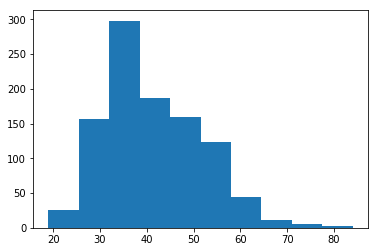

In [15]:
plt.hist(main_df['age'])

### we can have following categories for ages:
 age <= 25 years = young
 
 25 < age < 60 years = middle
 
 age >=60 years = senior

In [16]:
main_df['age'] = main_df.apply(lambda row: 'young' if row['age'] <= 25 else 'senior' if row['age'] >= 60 else 'middle', axis=1)

In [17]:
main_df.describe(include='all')

,age,job,marital status,education,credit default,housing loan,personal loan,y
count,1013,1013,1013,1013,1013,1013,1013,1013
unique,3,12,3,4,2,3,2,2
top,middle,blue-collar,married,secondary,no,yes,no,no
freq,949,217,612,520,991,580,864,891


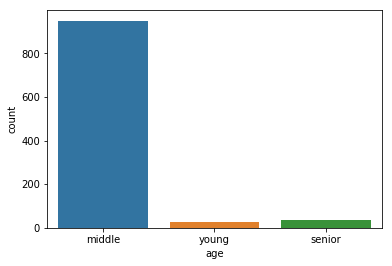

In [18]:
sns.countplot(data = main_df, x = "age")


## 2. Job

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

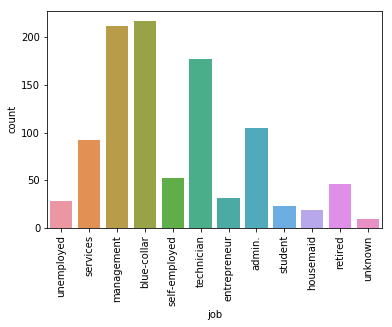

In [19]:
g = sns.countplot(data = main_df, x = "job")
plt.xticks(rotation=90)

In [20]:
main_df['job'].value_counts()*100/len(main_df)

blue-collar      21.421520
management       20.927937
technician       17.472853
admin.           10.365252
services          9.081935
self-employed     5.133268
retired           4.540967
entrepreneur      3.158934
unemployed        2.764067
student           2.270484
housemaid         1.875617
unknown           0.987167
Name: job, dtype: float64

In [21]:
# Removing unknowns

main_df = main_df[main_df['job'] != 'unknown']
len(main_df)

1003

### Lets merge some of these job categories together

earning = ['management', 'unemployed', 'blue-collar', 'entrepreneur', 'self-employed', 'technician', 'services', 'housemaid', 'admin.']

non-earning = ['student', 'retired']



In [22]:
main_df['job'] = main_df.apply(lambda row: 'earning' if row['job'] in ['management', 'unemployed', 'blue-collar', 'entrepreneur', 'self-employed', 'technician', 'services', 'housemaid', 'admin.'] else 'unknown' if row['job'] in ['unknown'] else 'non-earning', axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

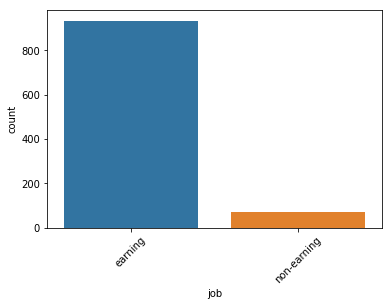

In [23]:
g = sns.countplot(data = main_df, x = "job")
plt.xticks(rotation=45)

## 3. Education

In [24]:
main_df['education'].value_counts()*100/len(main_df)

secondary    51.545364
tertiary     29.810568
primary      14.755733
unknown       3.888335
Name: education, dtype: float64

In [25]:
#Removing unknowns

main_df = main_df[main_df['education'] != 'unknown']
len(main_df)

964

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

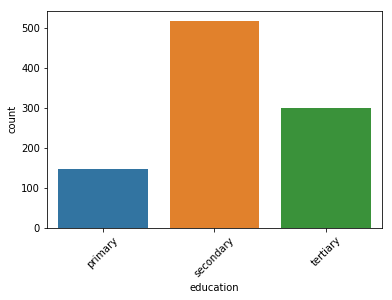

In [26]:
g = sns.countplot(data = main_df, x = "education")
plt.xticks(rotation=45)

## 4. Marital Status

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

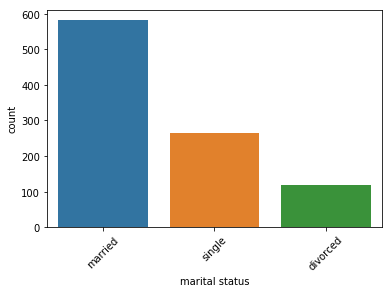

In [27]:
g = sns.countplot(data = main_df, x = "marital status")
plt.xticks(rotation=45)

## 5. Credit Default

(array([0, 1]), <a list of 2 Text xticklabel objects>)

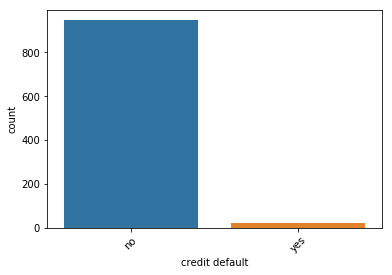

In [28]:
g = sns.countplot(data = main_df, x = "credit default")
plt.xticks(rotation=45)

## 6. Housing Loan

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

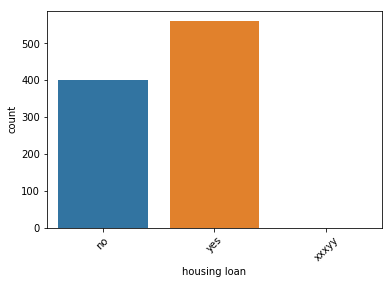

In [29]:
g = sns.countplot(data = main_df, x = "housing loan")
plt.xticks(rotation=45)

In [30]:
len(main_df[main_df['housing loan'] == 'xxxyy'])

1

#### There is one record that has housing loan as 'xxxyy' this is is clearly data that we dont need, hence lets drop this row

In [31]:
main_df = main_df[main_df['housing loan'] !=  'xxxyy']
len(main_df)


963

(array([0, 1]), <a list of 2 Text xticklabel objects>)

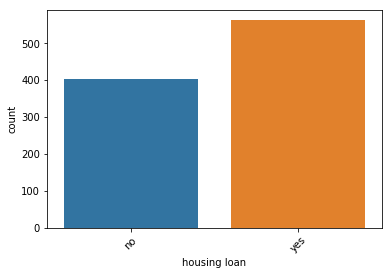

In [32]:
g = sns.countplot(data = main_df, x = "housing loan")
plt.xticks(rotation=45)

## 8. Personal Loan

(array([0, 1]), <a list of 2 Text xticklabel objects>)

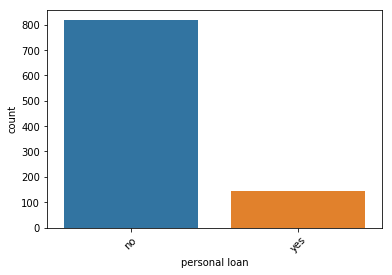

In [33]:
g = sns.countplot(data = main_df, x = "personal loan")
plt.xticks(rotation=45)

## 9. y Variable

(array([0, 1]), <a list of 2 Text xticklabel objects>)

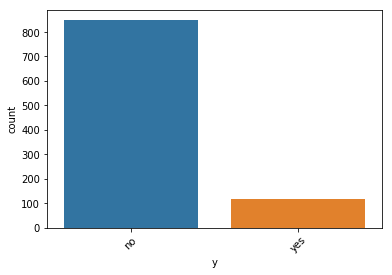

In [34]:
g = sns.countplot(data = main_df, x = "y")
plt.xticks(rotation=45)

In [35]:
#Checking the class balance

main_df['y'].value_counts()*100/len(main_df)

no     87.954309
yes    12.045691
Name: y, dtype: float64

# 4. Select Training data, test data 

In [36]:
### Encoding object variables to numerals.

In [37]:
cols = main_df.columns
cols

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

In [38]:
# Encoding the variable

from collections import defaultdict
d = defaultdict(LabelEncoder)

fit = main_df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
main_df = main_df.apply(lambda x: d[x.name].transform(x))

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [39]:
d['age'].inverse_transform([1])

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['senior'], dtype=object)

In [40]:
#Creating x and y datasets

X = main_df.drop(['y'], axis=1)
y = main_df['y']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# 5. Train the model 

In [42]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_split = 5, min_samples_leaf = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 6. Test the model (Predictions and reporting)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
#Printing wrong Predictions

result = pd.concat([y_test.reset_index(), pd.Series(y_pred)], axis=1)
result.columns = ['Index','Test Label', 'Prediction Label']

result[result['Test Label'] != result['Prediction Label']]

,Index,Test Label,Prediction Label
3,33,1,0
13,368,1,0
22,83,1,0
28,910,1,0
31,724,1,0
36,114,1,0
38,300,0,1
53,447,0,1
78,589,1,0
109,935,1,0


#### We can see that most of the label '1' are wrongly classified as 0. 
#### The main reason for this is the class imbalance in our dataset.


# 7. Evaluating the model

In [45]:
def accuray_parameters(y_test, y_pred):
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    
    confusion = confusion_matrix(y_test, y_pred)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    sns.heatmap(confusion, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.show()
    
    recall = TP/ (TP + FN)
    print("Recall: ", recall)

    precision = TP / (TP + FP)
    print("Precision: ", precision)
    
    print("F1 Score: ", f1_score(y_test, y_pred))


In [46]:
def save_tree_as_pdf(clf, file_name):
    if os.path.exists(file_name):
        os.remove(file_name)
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png())

    graph.write_pdf(file_name)



Accuracy:  0.8927335640138409


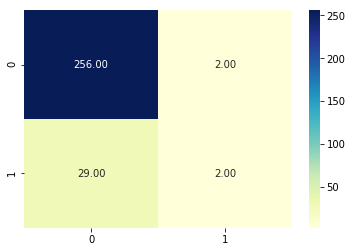

Recall:  0.06451612903225806
Precision:  0.5
F1 Score:  0.1142857142857143


In [47]:
accuray_parameters(y_test, y_pred)

In [48]:
save_tree_as_pdf(clf, "tree.pdf")

In [49]:
#SMOTE

# Apply SMOTE to increase the minority class to 33%

 

sm = over_sampling.SMOTENC(ratio = 0.5,random_state=100)
x_res, y_res = sm.fit_sample(X_train, y_train)

NameError: name 'over_sampling' is not defined